### Tennis Ace

#### Overview
This project contains a series of open-ended requirements which describe the project you'll be building. There are many possible ways to correctly fulfill all of these requirements, and you should expect to use the internet, Codecademy, and other resources when you encounter a problem.

#### Project Goals
You will create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analyzing and modeling the [Association of Tennis Professionals (ATP)](https://en.wikipedia.org/wiki/Association_of_Tennis_Professionals) data, you will determine what it takes to be one of the best tennis players in the world.

#### Prerequisites
##### Task 1
In order to complete this project, you should have completed the Linear Regression and Multiple Linear Regression lessons in the Machine Learning Course. This content is also covered in the Data Scientist Career Path.


##### Task 2
"Game, Set, Match!"
No three words are sweeter to hear as a tennis player than those, which indicate that a player has beaten their opponent. While you can head down to your nearest court and aim to overcome your challenger across the net without much practice, a league of professionals spends day and night, month after month practicing to be among the best in the world. Today you will put your linear regression knowledge to the test to better understand what it takes to be an all-star tennis player.

Provided in tennis_stats.csv is data from the men's professional tennis league, which is called the ATP (Association of Tennis Professionals). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive)statistics, return game (defensive) statistics and outcomes. Load the csv into a DataFrame and investigate it to gain familiarity with the data.

Open the hint for more information about each column of the dataset.

##### Identifying Data
The ATP men's tennis dataset includes a wide array of tennis statistics, which are described below:

- Player: name of the tennis player
- Year: year data was recorded

##### Service Game Columns (Offensive)

- `Aces`: number of serves by the player where the receiver does not touch the ball

- `DoubleFault`: number of times player missed both first and second serve attempts

- `FirstServe`: % of first-serve attempts made

- `FirstServePointsWon`: % of first-serve attempt points won by the player

- `SecondServePointsWon`: % of second-serve attempt points won by the player

- `BreakPointsFaced`: number of times where the receiver could have won service game of the player

- `BreakPointsSaved`: % of the time the player was able to stop the receiver from winning service game when they had the chance

- `ServiceGamesPlayed`: total number of games where the player served

- `ServiceGamesWon`: total number of games where the player served and won

- `TotalServicePointsWon`: % of points in games where the player served that they won

##### Return Game Columns (Defensive)

- `FirstServeReturnPointsWon`: % of opponents first-serve points the player was able to win

- `SecondServeReturnPointsWon`:% of opponents second-serve points the player was able to win

- `BreakPointsOpportunities`: number of times where the player could have won the service game of the opponent

- `BreakPointsConverted`: % of the time the player was able to win their opponent's service game when they had the chance

- `ReturnGamesPlayed`: total number of games where the player's opponent served

- `ReturnGamesWon`: total number of games where the player's opponent served and the player won

- `ReturnPointsWon`: total number of points where the player's opponent served and the player won

- `TotalPointsWon`: % of points won by the player 

##### Outcomes

- `Wins`: number of matches won in a year

- `Losses`: number of matches lost in a year

- `Winnings`: total winnings in USD($) in a year

- `Ranking`: ranking at the end of the year

##### Task 3
Perform exploratory analysis on the data by plotting different features against the different outcomes. What relationships do you find between the features and outcomes? Do any of the features seem to predict the outcomes?

#### Script.py

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


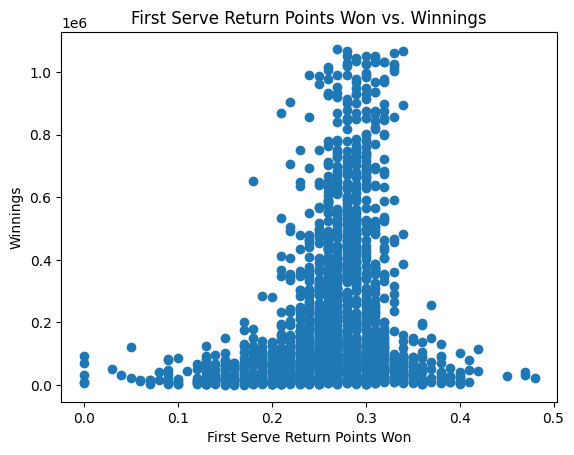

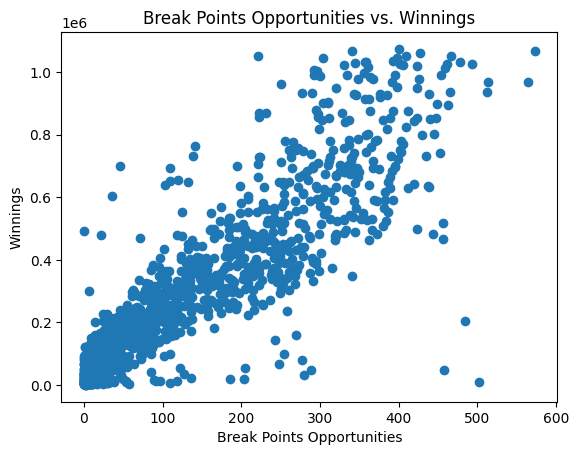

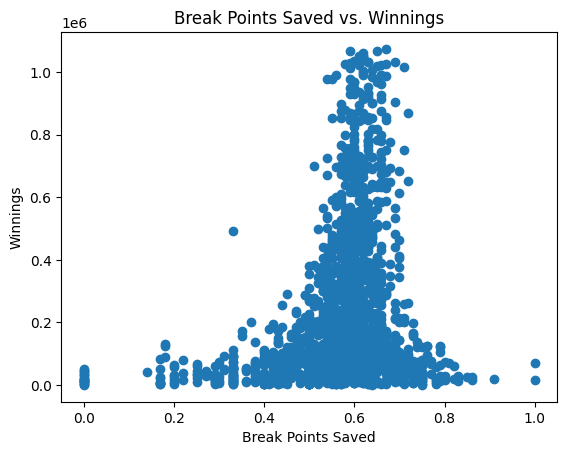

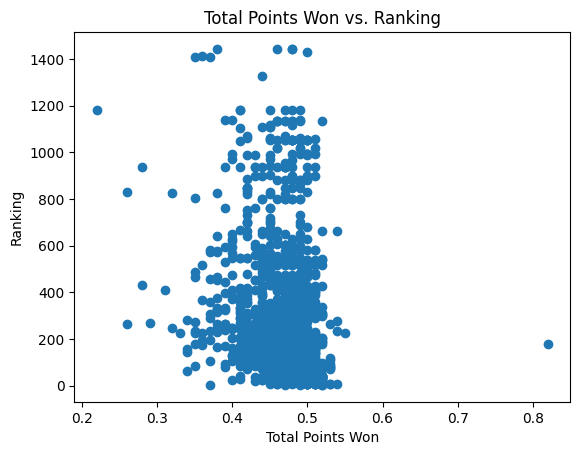

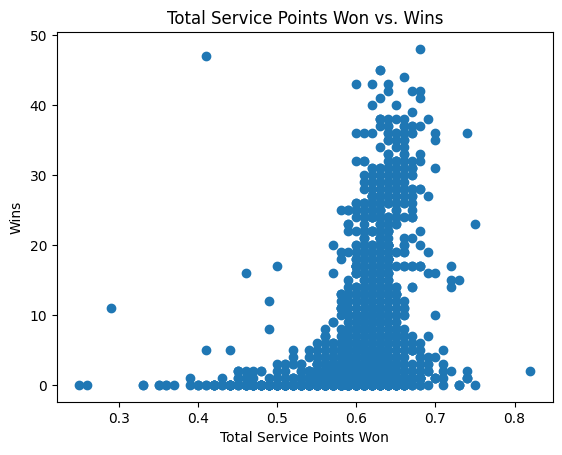

Predicting Winnings with Aces Test Score: 0.5686566115776635


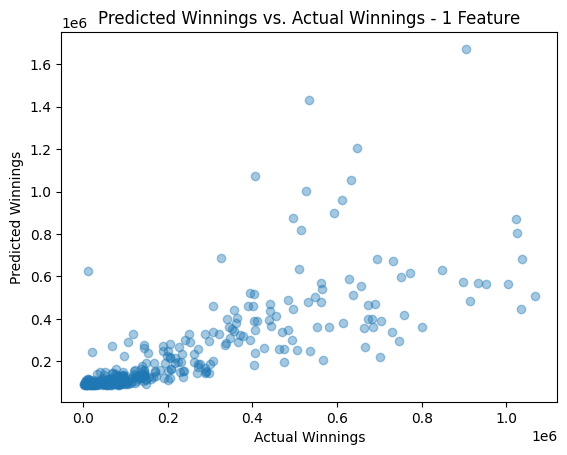

Predicting Winnings with BreakPointsOpportunities Test Score: 0.6908322456747493


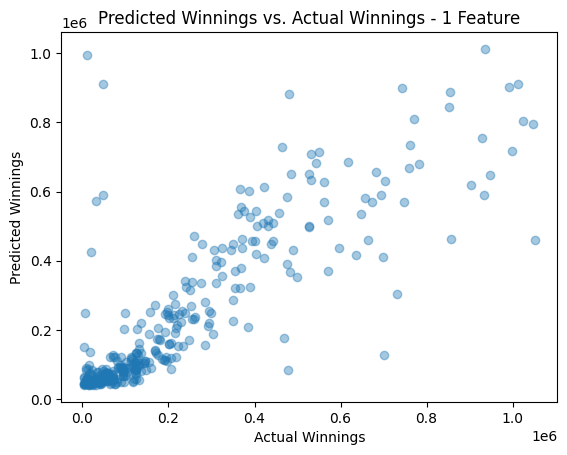

Predicting Winnings with 2 Features Test Score: 0.8119523296074734


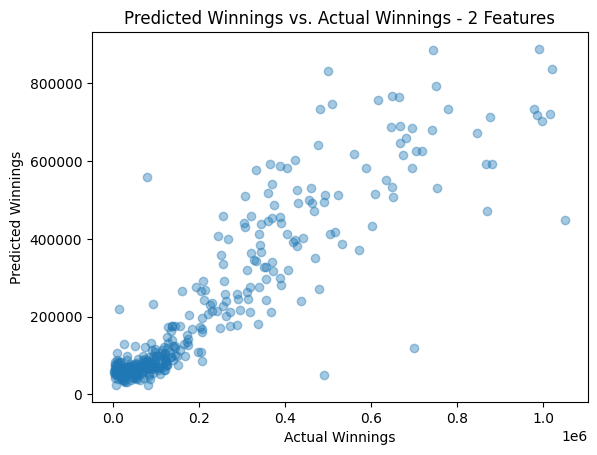

Predicting Winnings with Multiple Features Test Score: 0.8621062461130361


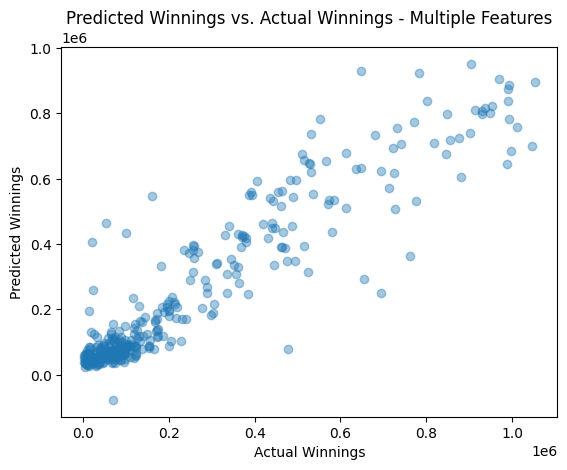

<Figure size 640x480 with 0 Axes>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load and investigate the data
players = pd.read_csv('tennis_stats.csv')

print(players.columns)

# Exploratory Analysis
plt.scatter(players['FirstServeReturnPointsWon'], players['Winnings'])
plt.title('First Serve Return Points Won vs. Winnings')
plt.xlabel('First Serve Return Points Won')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(players['BreakPointsOpportunities'], players['Winnings'])
plt.title('Break Points Opportunities vs. Winnings')
plt.xlabel('Break Points Opportunities')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(players['BreakPointsSaved'], players['Winnings'])
plt.title('Break Points Saved vs. Winnings')
plt.xlabel('Break Points Saved')
plt.ylabel('Winnings')
plt.show()
plt.clf()

plt.scatter(players['TotalPointsWon'], players['Ranking'])
plt.title('Total Points Won vs. Ranking')
plt.xlabel('Total Points Won')
plt.ylabel('Ranking')
plt.show()
plt.clf()

plt.scatter(players['TotalServicePointsWon'], players['Wins'])
plt.title('Total Service Points Won vs. Wins')
plt.xlabel('Total Service Points Won')
plt.ylabel('Wins')
plt.show()
plt.clf()

## single feature linear regression (Aces)

# select features and value to predict
features = players[['Aces']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size=0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

# score model on test data
print('Predicting Winnings with Aces Test Score:', model.score(features_test, winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test, winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## single feature linear regression (BreakPointsOpportunities)

# Select features and value to predict
features = players[['BreakPointsOpportunities']]
winnings = players[['Winnings']]

# Train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# Create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

# score model on test data
print('Predicting Winnings with BreakPointsOpportunities Test Score:', model.score(features_test, winnings_test))

# Make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test, winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 1 Feature')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## two feature linear regression

# select features and value to predict
features = players[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
winnings = players[['Winnings']]

features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size = 0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

# score model on test data
print('Predicting Winnings with 2 Features Test Score:', model.score(features_test, winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test, winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - 2 Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()

## multiple features linear regression

# select features and value to predict
features = players[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon','SecondServePointsWon','SecondServeReturnPointsWon','Aces','BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities','BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon','ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon','TotalServicePointsWon']]
winnings = players[['Winnings']]

# train, test, split the data
features_train, features_test, winnings_train, winnings_test = train_test_split(features, winnings, train_size=0.8)

# create and train model on training data
model = LinearRegression()
model.fit(features_train, winnings_train)

# score model on test data
print('Predicting Winnings with Multiple Features Test Score:', model.score(features_test, winnings_test))

# make predictions with model
winnings_prediction = model.predict(features_test)

# plot predictions against actual winnings
plt.scatter(winnings_test, winnings_prediction, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()